In [1]:
import pycbc.noise
from pycbc.noise import noise_from_psd
import pycbc.psd
import pylab as plt
import pycbc.filter as pfliter
from pycbc.waveform import get_td_waveform
import random
import numpy as np
import cProfile

/home/arush/anaconda3/envs/python39_1/lib/python3.9/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal
PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


In [2]:
T = 4
flow = 30.0
delta_f = 1.0 / T
flen = int(2048 / delta_f) + 1
delta_t = 1.0 / 4096
tsamples = int(T / delta_t)

In [3]:
SNR_array_2 = []
random_scale = 1200

In [4]:
# PSD
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
noisesamples = int(4 / delta_t)

27 17
l =  0  SNR =  22.83047283826585  m1 =  27  m2 =  17
18 22
l =  0  SNR =  21.579956373310765  m1 =  18  m2 =  22
21 28
l =  0  SNR =  25.70619627246368  m1 =  21  m2 =  28
12 17
l =  0  SNR =  16.541229732241636  m1 =  12  m2 =  17
14 25
l =  1  SNR =  19.75127129513408  m1 =  14  m2 =  25
24 16
l =  2  SNR =  22.95919792732765  m1 =  24  m2 =  16
21 28
l =  2  SNR =  26.100311937284275  m1 =  21  m2 =  28
19 18
l =  2  SNR =  20.1794680851391  m1 =  19  m2 =  18
12 26
l =  2  SNR =  21.109798560819513  m1 =  12  m2 =  26
28 23
l =  2  SNR =  25.902022089239544  m1 =  28  m2 =  23
15 20
l =  2  SNR =  20.10197146468521  m1 =  15  m2 =  20
14 22
l =  2  SNR =  20.357169538209686  m1 =  14  m2 =  22
21 30
l =  2  SNR =  24.648478299060905  m1 =  21  m2 =  30
11 23
l =  2  SNR =  17.961396039087916  m1 =  11  m2 =  23
14 13
l =  3  SNR =  16.48790526211065  m1 =  14  m2 =  13
16 11
l =  4  SNR =  14.578442247267668  m1 =  16  m2 =  11
24 23
l =  5  SNR =  23.988188609617726  m1 =  2

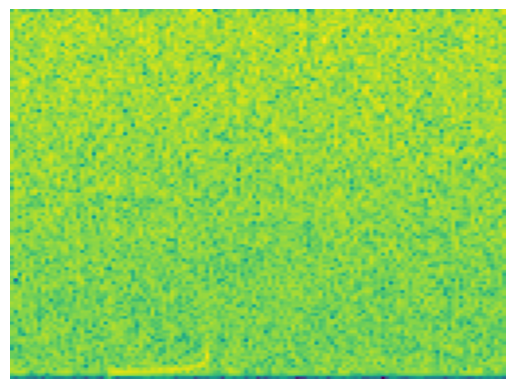

In [5]:
l = 0
while l < 100:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)

    # rolling:

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)

    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 25500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+25500}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

15 23
l =  100  SNR =  19.63664830021592  m1 =  15  m2 =  23
24 27
l =  101  SNR =  25.725926967883726  m1 =  24  m2 =  27
28 30
l =  101  SNR =  28.571348828671095  m1 =  28  m2 =  30
30 14
l =  101  SNR =  20.987184180382865  m1 =  30  m2 =  14
26 26
l =  101  SNR =  23.75695957470607  m1 =  26  m2 =  26
10 19
l =  101  SNR =  14.818263438363527  m1 =  10  m2 =  19
10 17
l =  102  SNR =  16.8970446994981  m1 =  10  m2 =  17
20 15
l =  103  SNR =  20.71374765847141  m1 =  20  m2 =  15
10 12
l =  103  SNR =  14.008425134760591  m1 =  10  m2 =  12
20 23
l =  104  SNR =  23.68070733943528  m1 =  20  m2 =  23
21 27
l =  104  SNR =  25.3301747219086  m1 =  21  m2 =  27
19 18
l =  104  SNR =  18.949369539657308  m1 =  19  m2 =  18
16 16
l =  105  SNR =  17.74585076607949  m1 =  16  m2 =  16
13 10
l =  106  SNR =  14.100716998886941  m1 =  13  m2 =  10
23 28
l =  107  SNR =  25.762485157807305  m1 =  23  m2 =  28
27 30
l =  107  SNR =  28.191725305083118  m1 =  27  m2 =  30
18 29
l =  107  S

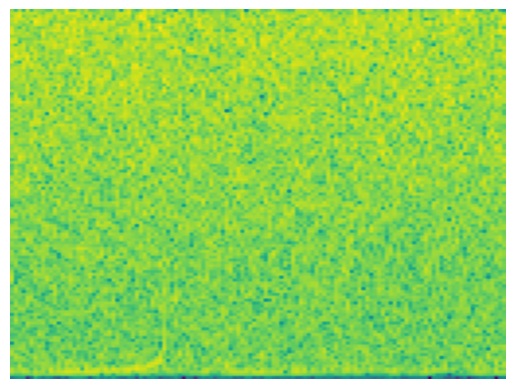

In [6]:
while l < 200:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)

    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 25500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+25500}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

29 11
l =  200  SNR =  17.811226220655083  m1 =  29  m2 =  11
17 25
l =  201  SNR =  21.88821338088829  m1 =  17  m2 =  25
28 27
l =  201  SNR =  27.327757698851464  m1 =  28  m2 =  27
22 12
l =  201  SNR =  17.732918035478487  m1 =  22  m2 =  12
11 13
l =  202  SNR =  14.470215032897611  m1 =  11  m2 =  13
20 16
l =  203  SNR =  19.85708105913463  m1 =  20  m2 =  16
25 18
l =  204  SNR =  21.36553219279816  m1 =  25  m2 =  18
10 27
l =  204  SNR =  16.47379341567397  m1 =  10  m2 =  27
13 17
l =  205  SNR =  17.517467072969033  m1 =  13  m2 =  17
11 19
l =  206  SNR =  17.645494612953126  m1 =  11  m2 =  19
16 12
l =  207  SNR =  15.27456633602405  m1 =  16  m2 =  12
12 11
l =  208  SNR =  14.970578599420381  m1 =  12  m2 =  11
10 17
l =  209  SNR =  16.912319623673447  m1 =  10  m2 =  17
14 21
l =  210  SNR =  21.07642541031176  m1 =  14  m2 =  21
24 16
l =  210  SNR =  19.98338323425049  m1 =  24  m2 =  16
29 10
l =  211  SNR =  15.255646725985306  m1 =  29  m2 =  10
14 18
l =  212 

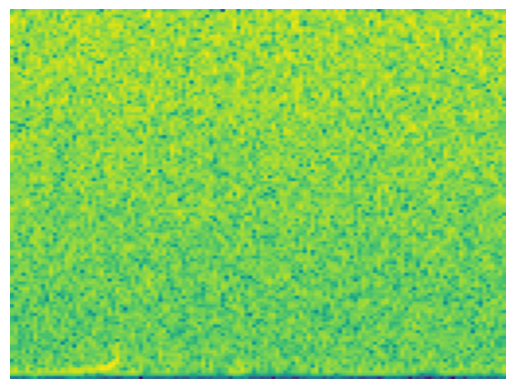

In [7]:
while l < 300:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)

    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 25500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+25500}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

12 22
l =  300  SNR =  18.417287053969783  m1 =  12  m2 =  22
13 12
l =  301  SNR =  16.29342134667589  m1 =  13  m2 =  12
29 20
l =  302  SNR =  25.372228591193945  m1 =  29  m2 =  20
14 20
l =  302  SNR =  19.075589688046897  m1 =  14  m2 =  20
26 10
l =  303  SNR =  16.649706672918192  m1 =  26  m2 =  10
28 14
l =  304  SNR =  22.275610005206328  m1 =  28  m2 =  14
30 21
l =  304  SNR =  26.98138493356448  m1 =  30  m2 =  21
17 25
l =  304  SNR =  21.31288325468977  m1 =  17  m2 =  25
28 28
l =  304  SNR =  26.49526821894909  m1 =  28  m2 =  28
10 19
l =  304  SNR =  16.81751167611957  m1 =  10  m2 =  19
19 12
l =  305  SNR =  16.865912215206176  m1 =  19  m2 =  12
28 16
l =  306  SNR =  23.105178064819164  m1 =  28  m2 =  16
28 14
l =  306  SNR =  20.488404798088407  m1 =  28  m2 =  14
18 25
l =  306  SNR =  21.06902067097207  m1 =  18  m2 =  25
11 11
l =  306  SNR =  13.597015668915585  m1 =  11  m2 =  11
12 25
l =  307  SNR =  17.22054701524262  m1 =  12  m2 =  25
13 14
l =  308 

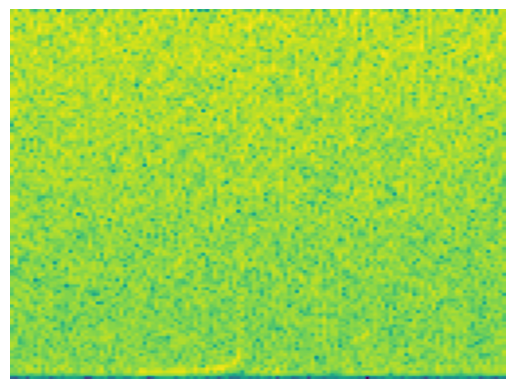

In [8]:
while l < 400:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)

    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 25500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+25500}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

13 30
l =  400  SNR =  18.515198640094255  m1 =  13  m2 =  30
26 11
l =  401  SNR =  17.493932550352422  m1 =  26  m2 =  11
25 26
l =  402  SNR =  25.813272423220123  m1 =  25  m2 =  26
24 19
l =  402  SNR =  23.272770950425087  m1 =  24  m2 =  19
29 23
l =  402  SNR =  27.16802751227829  m1 =  29  m2 =  23
11 28
l =  402  SNR =  18.941432227895742  m1 =  11  m2 =  28
17 30
l =  403  SNR =  22.65110316639174  m1 =  17  m2 =  30
21 30
l =  403  SNR =  24.09533204978546  m1 =  21  m2 =  30
23 15
l =  403  SNR =  19.035111781052667  m1 =  23  m2 =  15
20 15
l =  404  SNR =  19.853223683713125  m1 =  20  m2 =  15
27 27
l =  405  SNR =  26.651736976023617  m1 =  27  m2 =  27
26 29
l =  405  SNR =  28.759007852496648  m1 =  26  m2 =  29
30 23
l =  405  SNR =  25.740290485879235  m1 =  30  m2 =  23
16 20
l =  405  SNR =  18.902005585253626  m1 =  16  m2 =  20
23 30
l =  406  SNR =  25.414350564058918  m1 =  23  m2 =  30
11 11
l =  406  SNR =  12.993772851380777  m1 =  11  m2 =  11
30 19
l =  

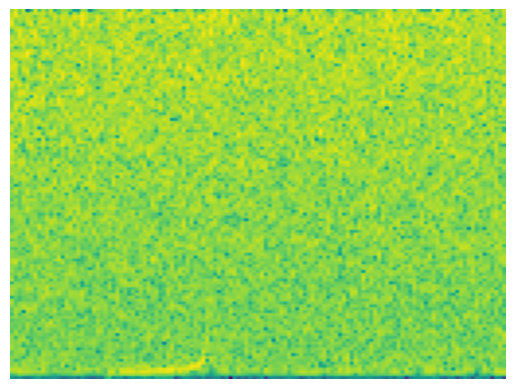

In [9]:
while l < 500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)

    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 25500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+25500}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

In [10]:
while l < 500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)

    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 25500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+25500}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

18 20
l =  500  SNR =  20.176348659135243  m1 =  18  m2 =  20
12 25
l =  500  SNR =  19.373882420673034  m1 =  12  m2 =  25
20 29
l =  501  SNR =  25.058123841097498  m1 =  20  m2 =  29
26 15
l =  501  SNR =  21.39929646125135  m1 =  26  m2 =  15
28 18
l =  501  SNR =  23.604491059876388  m1 =  28  m2 =  18
25 30
l =  501  SNR =  26.907017166210554  m1 =  25  m2 =  30
19 13
l =  501  SNR =  17.414221045012457  m1 =  19  m2 =  13
12 29
l =  502  SNR =  21.180655887072664  m1 =  12  m2 =  29
26 15
l =  502  SNR =  20.992787699049295  m1 =  26  m2 =  15
12 22
l =  502  SNR =  18.042967616157924  m1 =  12  m2 =  22
10 11
l =  503  SNR =  13.81003182279135  m1 =  10  m2 =  11
21 13
l =  504  SNR =  18.3252807163203  m1 =  21  m2 =  13
24 30
l =  505  SNR =  26.53915900339289  m1 =  24  m2 =  30
17 30
l =  505  SNR =  23.5307969744457  m1 =  17  m2 =  30
19 11
l =  505  SNR =  15.063516654516217  m1 =  19  m2 =  11
29 11
l =  506  SNR =  19.058726461001744  m1 =  29  m2 =  11
16 29
l =  507 

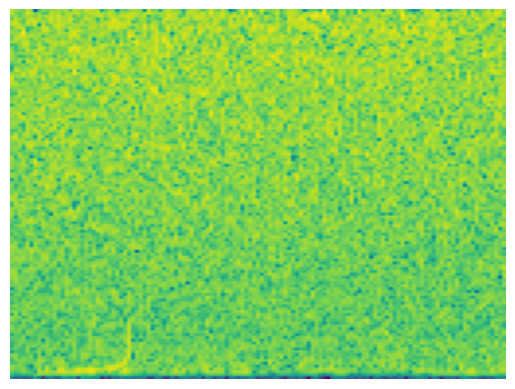

In [11]:
while l < 600:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)

    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 25500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+25500}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

20 27
l =  600  SNR =  23.95799935669398  m1 =  20  m2 =  27
13 23
l =  600  SNR =  21.016778294563636  m1 =  13  m2 =  23
14 23
l =  600  SNR =  18.673281607524565  m1 =  14  m2 =  23
22 26
l =  601  SNR =  25.70227436968499  m1 =  22  m2 =  26
23 17
l =  601  SNR =  20.691109000481248  m1 =  23  m2 =  17
20 26
l =  601  SNR =  22.485885205900484  m1 =  20  m2 =  26
11 16
l =  601  SNR =  13.572765751348198  m1 =  11  m2 =  16
17 20
l =  602  SNR =  22.32917792238463  m1 =  17  m2 =  20
12 14
l =  602  SNR =  14.340190668889935  m1 =  12  m2 =  14
27 15
l =  603  SNR =  21.55299060799576  m1 =  27  m2 =  15
28 18
l =  603  SNR =  21.128583237131117  m1 =  28  m2 =  18
11 22
l =  603  SNR =  17.799344340525366  m1 =  11  m2 =  22
14 12
l =  604  SNR =  15.778135516444522  m1 =  14  m2 =  12
10 11
l =  605  SNR =  15.069481509911576  m1 =  10  m2 =  11
26 21
l =  606  SNR =  24.186771472479023  m1 =  26  m2 =  21
29 16
l =  606  SNR =  22.694405572019196  m1 =  29  m2 =  16
17 12
l =  6

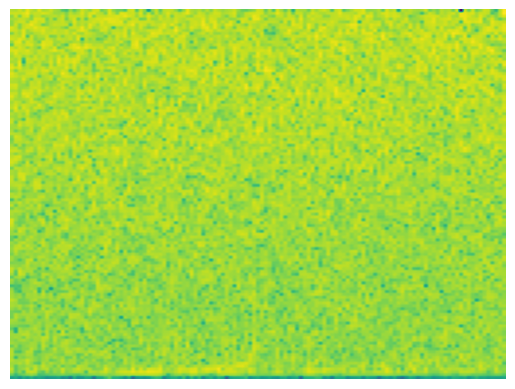

In [12]:
while l < 700:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)

    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 25500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+25500}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

14 27
l =  700  SNR =  19.847935739390955  m1 =  14  m2 =  27
10 21
l =  701  SNR =  16.73947647912903  m1 =  10  m2 =  21
29 26
l =  702  SNR =  28.159760649558905  m1 =  29  m2 =  26
24 17
l =  702  SNR =  21.935838819452663  m1 =  24  m2 =  17
28 25
l =  702  SNR =  26.44887835606647  m1 =  28  m2 =  25
25 26
l =  702  SNR =  27.53469347975312  m1 =  25  m2 =  26
19 30
l =  702  SNR =  24.706007718102097  m1 =  19  m2 =  30
19 24
l =  702  SNR =  22.188349833073755  m1 =  19  m2 =  24
27 20
l =  702  SNR =  21.47870133127559  m1 =  27  m2 =  20
25 24
l =  702  SNR =  26.185940320723144  m1 =  25  m2 =  24
21 26
l =  702  SNR =  26.93987637683847  m1 =  21  m2 =  26
27 15
l =  702  SNR =  20.769116411226708  m1 =  27  m2 =  15
30 21
l =  702  SNR =  25.122572887110657  m1 =  30  m2 =  21
13 24
l =  702  SNR =  18.152012008441883  m1 =  13  m2 =  24
20 27
l =  703  SNR =  24.50925647379943  m1 =  20  m2 =  27
29 23
l =  703  SNR =  25.808872328101938  m1 =  29  m2 =  23
16 14
l =  703

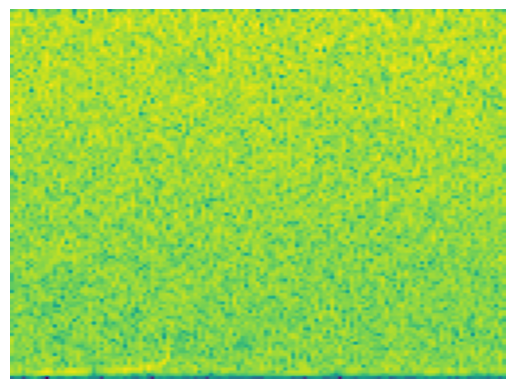

In [13]:
while l < 800:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)

    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 25500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+25500}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

19 26
l =  800  SNR =  21.60218032758819  m1 =  19  m2 =  26
11 12
l =  800  SNR =  14.542368547670074  m1 =  11  m2 =  12
23 30
l =  801  SNR =  26.610119925997648  m1 =  23  m2 =  30
20 12
l =  801  SNR =  17.225365971505134  m1 =  20  m2 =  12
16 15
l =  802  SNR =  18.302587701743164  m1 =  16  m2 =  15
20 15
l =  803  SNR =  20.963099366524695  m1 =  20  m2 =  15
10 12
l =  803  SNR =  13.651008796335981  m1 =  10  m2 =  12
20 19
l =  804  SNR =  23.40632152387935  m1 =  20  m2 =  19
21 10
l =  804  SNR =  15.47170791683711  m1 =  21  m2 =  10
13 13
l =  805  SNR =  15.118556307310767  m1 =  13  m2 =  13
16 12
l =  806  SNR =  17.127649826929954  m1 =  16  m2 =  12
26 26
l =  807  SNR =  26.24258932544413  m1 =  26  m2 =  26
10 30
l =  807  SNR =  16.933444792064403  m1 =  10  m2 =  30
17 17
l =  808  SNR =  19.353374584720672  m1 =  17  m2 =  17
22 19
l =  809  SNR =  21.843414098734574  m1 =  22  m2 =  19
29 25
l =  809  SNR =  28.792375235811505  m1 =  29  m2 =  25
11 28
l =  8

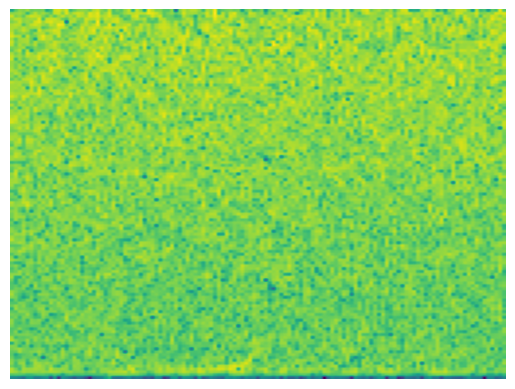

In [14]:
while l < 900:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)

    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 25500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+25500}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

21 28
l =  900  SNR =  23.986023649143256  m1 =  21  m2 =  28
29 15
l =  900  SNR =  22.403982505038037  m1 =  29  m2 =  15
17 21
l =  900  SNR =  21.75902956535162  m1 =  17  m2 =  21
10 12
l =  900  SNR =  13.75507870909654  m1 =  10  m2 =  12
27 21
l =  901  SNR =  24.78968039502252  m1 =  27  m2 =  21
12 17
l =  901  SNR =  17.61599432864422  m1 =  12  m2 =  17
30 14
l =  902  SNR =  20.923921170802128  m1 =  30  m2 =  14
18 30
l =  902  SNR =  25.608094234630975  m1 =  18  m2 =  30
18 23
l =  902  SNR =  20.18902255049816  m1 =  18  m2 =  23
11 28
l =  902  SNR =  18.924266243668807  m1 =  11  m2 =  28
23 27
l =  903  SNR =  25.70057042976337  m1 =  23  m2 =  27
25 26
l =  903  SNR =  25.14335492046373  m1 =  25  m2 =  26
28 30
l =  903  SNR =  28.190222585583452  m1 =  28  m2 =  30
13 23
l =  903  SNR =  19.249779249101056  m1 =  13  m2 =  23
25 28
l =  904  SNR =  25.54615387925522  m1 =  25  m2 =  28
24 27
l =  904  SNR =  26.600614247324877  m1 =  24  m2 =  27
21 21
l =  904  

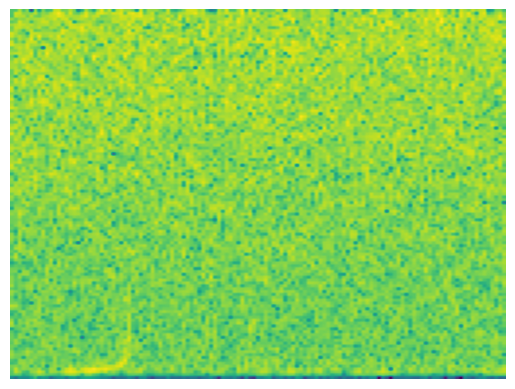

In [15]:
while l < 1000:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)

    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 25500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+25500}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

19 15
l =  1000  SNR =  19.986793254313742  m1 =  19  m2 =  15
29 10
l =  1001  SNR =  18.735378368352936  m1 =  29  m2 =  10
16 12
l =  1002  SNR =  15.02905024187241  m1 =  16  m2 =  12
30 12
l =  1003  SNR =  20.23104360590228  m1 =  30  m2 =  12
19 22
l =  1003  SNR =  22.067908265795438  m1 =  19  m2 =  22
24 16
l =  1003  SNR =  19.637070841151285  m1 =  24  m2 =  16
12 20
l =  1004  SNR =  16.191904196486526  m1 =  12  m2 =  20
16 12
l =  1005  SNR =  14.895970494967742  m1 =  16  m2 =  12
11 12
l =  1006  SNR =  14.116607039695497  m1 =  11  m2 =  12
29 11
l =  1007  SNR =  17.502350249453666  m1 =  29  m2 =  11
11 15
l =  1008  SNR =  16.625411255002334  m1 =  11  m2 =  15
28 23
l =  1009  SNR =  26.891454348078675  m1 =  28  m2 =  23
13 22
l =  1009  SNR =  20.89876774688927  m1 =  13  m2 =  22
17 23
l =  1009  SNR =  20.89801159727332  m1 =  17  m2 =  23
27 26
l =  1009  SNR =  25.59751216946731  m1 =  27  m2 =  26
29 20
l =  1009  SNR =  25.831799554665686  m1 =  29  m2 =  

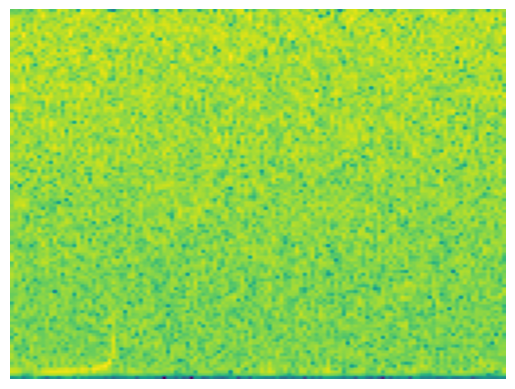

In [16]:
while l < 1100:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)

    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 25500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+25500}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

12 29
l =  1100  SNR =  19.321148079292623  m1 =  12  m2 =  29
26 30
l =  1101  SNR =  27.089411298308942  m1 =  26  m2 =  30
20 12
l =  1101  SNR =  18.406641426803233  m1 =  20  m2 =  12
17 10
l =  1102  SNR =  15.842128355492171  m1 =  17  m2 =  10
20 13
l =  1103  SNR =  19.123991786527185  m1 =  20  m2 =  13
15 28
l =  1104  SNR =  20.270363591743116  m1 =  15  m2 =  28
30 24
l =  1104  SNR =  25.607215523309563  m1 =  30  m2 =  24
14 17
l =  1104  SNR =  17.855480064452923  m1 =  14  m2 =  17
13 21
l =  1105  SNR =  19.08371996748251  m1 =  13  m2 =  21
10 17
l =  1106  SNR =  17.351267319668963  m1 =  10  m2 =  17
29 21
l =  1107  SNR =  26.776313934968016  m1 =  29  m2 =  21
21 21
l =  1107  SNR =  22.50379068421868  m1 =  21  m2 =  21
23 26
l =  1107  SNR =  24.36903183400883  m1 =  23  m2 =  26
27 29
l =  1107  SNR =  28.67477763301414  m1 =  27  m2 =  29
19 27
l =  1107  SNR =  23.88939196090044  m1 =  19  m2 =  27
16 28
l =  1107  SNR =  21.88499221996957  m1 =  16  m2 =  2

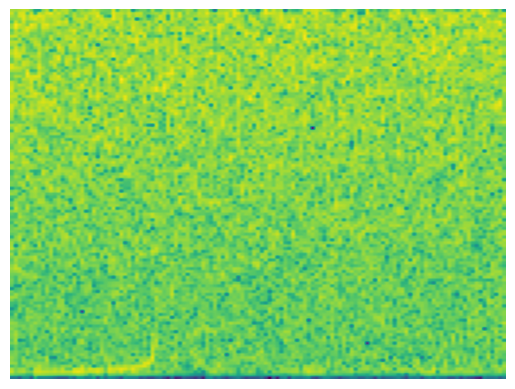

In [17]:
while l < 1200:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)

    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 25500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+25500}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

11 24
l =  1200  SNR =  18.166668931267292  m1 =  11  m2 =  24
14 15
l =  1201  SNR =  16.921812746944756  m1 =  14  m2 =  15
13 21
l =  1202  SNR =  19.480396847563675  m1 =  13  m2 =  21
19 13
l =  1203  SNR =  18.274756146841824  m1 =  19  m2 =  13
20 23
l =  1204  SNR =  22.01465142663167  m1 =  20  m2 =  23
19 26
l =  1204  SNR =  23.281132998979473  m1 =  19  m2 =  26
19 15
l =  1204  SNR =  20.26086685686898  m1 =  19  m2 =  15
24 24
l =  1204  SNR =  25.06631645844856  m1 =  24  m2 =  24
12 20
l =  1204  SNR =  17.10792193241937  m1 =  12  m2 =  20
24 16
l =  1205  SNR =  20.856876457147706  m1 =  24  m2 =  16
27 26
l =  1205  SNR =  26.10062380214246  m1 =  27  m2 =  26
26 17
l =  1205  SNR =  21.61094379697323  m1 =  26  m2 =  17
12 21
l =  1205  SNR =  18.00157008727694  m1 =  12  m2 =  21
28 11
l =  1206  SNR =  18.53872505751437  m1 =  28  m2 =  11
29 13
l =  1207  SNR =  21.512984226028482  m1 =  29  m2 =  13
23 30
l =  1207  SNR =  25.814833925144722  m1 =  23  m2 =  30


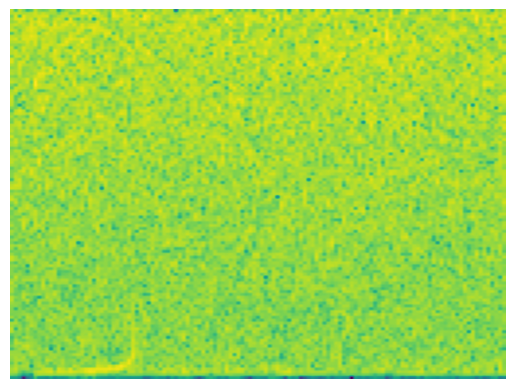

In [18]:
while l < 1300:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)

    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 25500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+25500}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

19 30
l =  1300  SNR =  23.73881575061326  m1 =  19  m2 =  30
17 20
l =  1300  SNR =  19.831795529051703  m1 =  17  m2 =  20
22 23
l =  1301  SNR =  23.02572177504077  m1 =  22  m2 =  23
11 23
l =  1301  SNR =  17.66601234778662  m1 =  11  m2 =  23
12 29
l =  1302  SNR =  19.842822622326995  m1 =  12  m2 =  29
12 10
l =  1303  SNR =  13.325047500387281  m1 =  12  m2 =  10
25 27
l =  1304  SNR =  25.194370646487105  m1 =  25  m2 =  27
21 21
l =  1304  SNR =  21.83715586328958  m1 =  21  m2 =  21
25 15
l =  1304  SNR =  19.965200668411132  m1 =  25  m2 =  15
28 26
l =  1305  SNR =  28.47206826647757  m1 =  28  m2 =  26
23 15
l =  1305  SNR =  20.54246144955033  m1 =  23  m2 =  15
12 26
l =  1305  SNR =  18.282780440736307  m1 =  12  m2 =  26
28 11
l =  1306  SNR =  19.459157248027722  m1 =  28  m2 =  11
22 19
l =  1307  SNR =  22.154578426423026  m1 =  22  m2 =  19
25 26
l =  1307  SNR =  26.06847237843623  m1 =  25  m2 =  26
25 20
l =  1307  SNR =  22.866741668114507  m1 =  25  m2 =  20

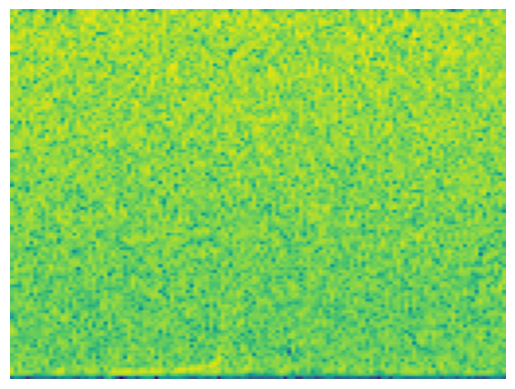

In [19]:
while l < 1400:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)

    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 25500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+25500}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

22 22
l =  1400  SNR =  22.485198074202117  m1 =  22  m2 =  22
25 30
l =  1400  SNR =  28.04933901483342  m1 =  25  m2 =  30
23 18
l =  1400  SNR =  22.085747646289576  m1 =  23  m2 =  18
24 13
l =  1400  SNR =  17.612377506733388  m1 =  24  m2 =  13
26 13
l =  1401  SNR =  20.291879668567084  m1 =  26  m2 =  13
12 14
l =  1401  SNR =  17.344538647066514  m1 =  12  m2 =  14
11 16
l =  1402  SNR =  16.920985023032706  m1 =  11  m2 =  16
19 29
l =  1403  SNR =  23.87866549310092  m1 =  19  m2 =  29
19 16
l =  1403  SNR =  19.839553390345543  m1 =  19  m2 =  16
13 16
l =  1404  SNR =  17.53332129983122  m1 =  13  m2 =  16
15 10
l =  1405  SNR =  16.18547458918809  m1 =  15  m2 =  10
27 12
l =  1406  SNR =  19.693635517998697  m1 =  27  m2 =  12
17 22
l =  1407  SNR =  20.82852942144665  m1 =  17  m2 =  22
10 20
l =  1407  SNR =  14.222399118464788  m1 =  10  m2 =  20
15 24
l =  1408  SNR =  18.993486028231573  m1 =  15  m2 =  24
14 21
l =  1409  SNR =  18.022950689488656  m1 =  14  m2 =  

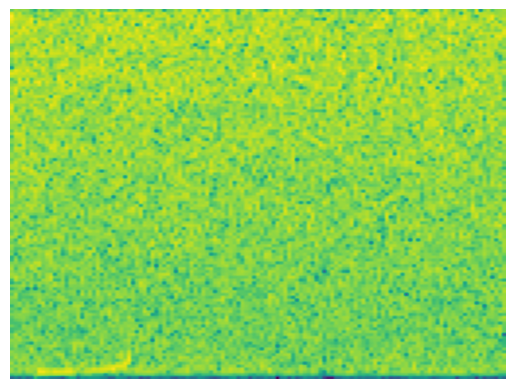

In [20]:
while l < 1500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)

    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 25500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+25500}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

wavform generate random mass
scale wvfrm
add to noise
calc snr
make spectrograms
classify into folders
